In [14]:
import cv2
import urllib.request as rq

url = 'http://uta.pw/shodou/img/28/214.png'
rq.urlretrieve(url, "test.png")

('test.png', <http.client.HTTPMessage at 0x18a09f45e10>)

In [15]:
img = cv2.imread("test.png")
print(img)

print(type(img))

%matplotlib inline

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
<class 'numpy.ndarray'>


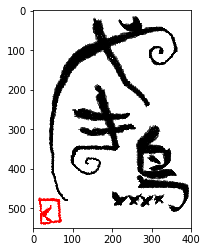

In [16]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

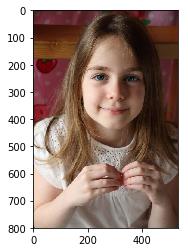

In [17]:
img = cv2.imread('./image/test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

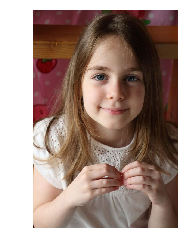

In [18]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

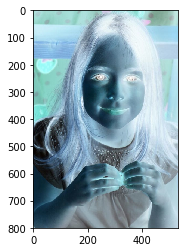

In [19]:
negImg = 255 - img

plt.imshow(cv2.cvtColor(negImg, cv2.COLOR_BGR2RGB))
plt.show()

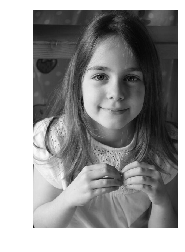

In [20]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(grayImg, cmap="gray")
plt.axis('off')
plt.show()

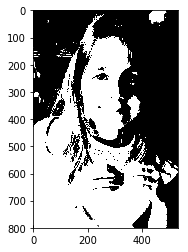

In [21]:
img = cv2.imread('./image/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th = 90
img[img > th] = 255
img[img < th] = 0

plt.imshow(img, cmap="gray")
plt.show()

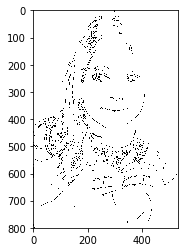

In [22]:
img = cv2.imread('./image/test.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.Canny(img, 100, 200, 255)
img = 255 - img

cv2.imwrite("out.png", img)

plt.imshow(img, cmap='gray')
plt.show()

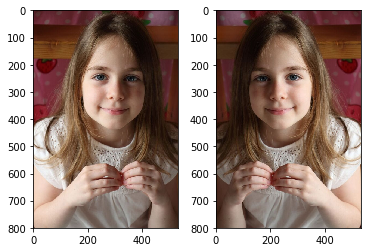

In [23]:
img = cv2.imread('./image/test.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor (img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
img2 = cv2.flip(img, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

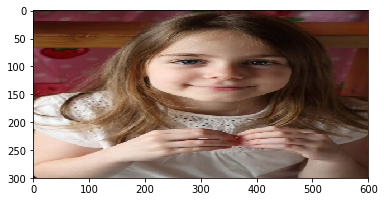

In [24]:
img = cv2.imread('./image/test.jpg')

img2 = cv2.resize(img, (600, 300))

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

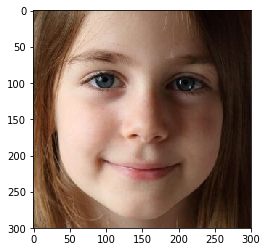

In [25]:
img2 = img[150:450, 150:450]

cv2.imwrite('out-test.png', img2)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

Vector :  319 308 405 405


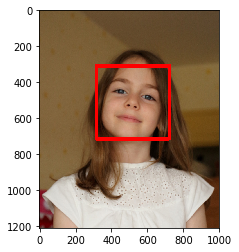

In [27]:
cf = "haarcascade_frontalface_alt.xml"
c = cv2.CascadeClassifier(cf)

img = img = cv2.imread('./image/girl.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = c.detectMultiScale(img_gray, minSize=(150, 150))

if len(face_list) == 0:
    print('Fail')
    quit()
for (x, y, w, h) in face_list:
    print('Vector : ', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

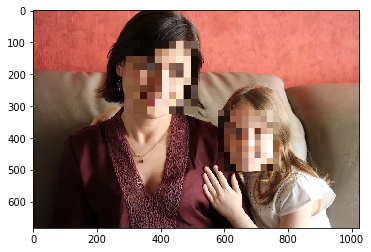

In [47]:
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

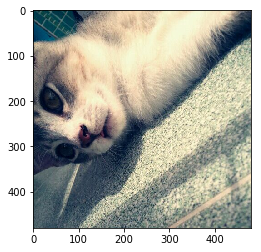

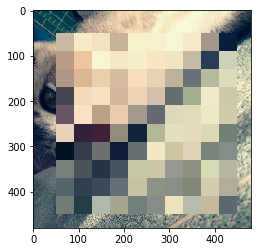

In [49]:
img = cv2.imread("cat.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

mos = mosaic(img, (50, 50, 450, 450), 10)
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
from scipy import ndimage
# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")
# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)
# 여러 각도의 이미지를 만들고 테스트하기
from scipy import ndimage
# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "haarcascade_frontalface_alt.xml"

cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")
# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)
# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'cv2' is not defined